# U.S. Medical Insurance Costs Analysis

## 📌 Project Overview

This project explores a U.S. medical insurance dataset to understand how lifestyle and demographic factors affect insurance costs. Specifically, it investigates the relationship between age, smoking status, BMI, and region on medical charges. The analysis aims to answer: _Are certain groups disproportionately charged more for medical insurance?_

# 🎯 Project Scope & Objectives
- **Compare insurance costs across categories**: age vs. smoker status
- **Quantify the cost of being a smoker**: average charges for smokers vs. non-smokers, filtered by age group
- **Identify high-cost regions**: Find regions with the most expensive individuals and analyze their, smoking habits, and number of children
- **Uncover disproportionate charges**: Determine if certain lifestyle choices result in higher charges across demographics or regions
- **Present actionable insights**: Use visual and statistical analysis to present findings

# 🧹 Data Preparation

We begin by importing necessary libraries and loading the dataset. The goal here is to inspect the structure and content of the data before analysis.

In [193]:
# Import CSV library

import csv

# Initialize lists to hold data

age = []
sex = []
bmi = []
children = [] 
smoker = []
region = []
charges = []

# Read and extract data from CSV file
with open ('insurance.csv', 'r', newline='') as insurance_csv:
    insurance_data = csv.DictReader(insurance_csv)
    for row in insurance_data:
        age.append(int(row['age']))
        sex.append(row['sex'])
        bmi.append(float(row['bmi']))
        children.append(int(row['children']))
        smoker.append(row['smoker'])
        region.append(row['region'])
    
        charges.append(float(row['charges']))


#  📊 Exploratory Data Analysis (EDA)

I'll perform basic analysis to extract meaningful insights from the dataset, such as averages and patterns across groups.

In [195]:
# Preview first 10 entries for each feature
print('First 10 ages: ', age[:10])
print('First 10 genders: ', sex[:10])
print('First 10 bmi information: ', bmi[:10])
print('First 10 children information: ', children[:10])
print('First 10 smoker status: ', smoker[:10])
print('First 10 region ', region[:10])
print('First 10 insurance costs ', charges[:10])

# combine charges and smoker status, then sort
charge_smoker_pairs = list(zip(charges, smoker))
charge_smoker_sorted = sorted(charge_smoker_pairs, key=lambda x: x[0])
least_expensive_charges = charge_smoker_sorted[:10]
most_expensive_charges = charge_smoker_sorted[-10:]

# Display bottom 10 insurance costs and smoker info
print('10 Cheapest insurance charges and smoking status: ')
for charge, smoker_status in least_expensive_charges:
    print(f'${charge:.2f} - smoker: {smoker_status}')

# Display top 10 insurance costs and smoker info
print('10 Most expensive insurance charges and smoking status: ')
for charge, smoker_status in most_expensive_charges:
    print(f'${charge:.2f} - smoker: {smoker_status}')

First 10 ages:  [19, 18, 28, 33, 32, 31, 46, 37, 37, 60]
First 10 genders:  ['female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female']
First 10 bmi information:  [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84]
First 10 children information:  [0, 1, 3, 0, 0, 0, 1, 3, 2, 0]
First 10 smoker status:  ['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
First 10 region  ['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest']
First 10 insurance costs  [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692]
10 Cheapest insurance charges and smoking status: 
$1121.87 - smoker: no
$1131.51 - smoker: no
$1135.94 - smoker: no
$1136.40 - smoker: no
$1137.01 - smoker: no
$1137.47 - smoker: no
$1141.45 - smoker: no
$1146.80 - smoker: no
$1149.40 - smoker: no
$1163.46 - smoker: no
10 Most expensive insurance

In [196]:
# Convert relevant details into tuples to avoid error when using loops
charge_details = list(zip(charges, smoker, region, age))

# Sort by insurance charge and then age
charge_details_sorted = sorted(charge_details, key=lambda x: (x[0], x[3]))

# Display 20 individuals with lowest insurance charges
print('20 least expensive charges:')
for charge, smoker, region, age in charge_details_sorted[:20]:
    print(f'${charge:.2f}: Smoker: {smoker} | Region: {region} | Age: {age}')

# Display 20 individuals with highest insurance charges
print('Top 20 most expensive charges:')
for charge, smoker, region, age in charge_details_sorted[-20:][::-1]:
    print(f'${charge:.2f}: Smoker: {smoker} | Region: {region} | Age: {age}')

20 least expensive charges:
$1121.87: Smoker: no | Region: southeast | Age: 18
$1131.51: Smoker: no | Region: southeast | Age: 18
$1135.94: Smoker: no | Region: southeast | Age: 18
$1136.40: Smoker: no | Region: southeast | Age: 18
$1137.01: Smoker: no | Region: southeast | Age: 18
$1137.47: Smoker: no | Region: southeast | Age: 18
$1141.45: Smoker: no | Region: southeast | Age: 18
$1146.80: Smoker: no | Region: southeast | Age: 18
$1149.40: Smoker: no | Region: southeast | Age: 18
$1163.46: Smoker: no | Region: southeast | Age: 18
$1241.57: Smoker: no | Region: southwest | Age: 19
$1242.26: Smoker: no | Region: southwest | Age: 19
$1242.82: Smoker: no | Region: southwest | Age: 19
$1252.41: Smoker: no | Region: southwest | Age: 19
$1253.94: Smoker: no | Region: southwest | Age: 19
$1256.30: Smoker: no | Region: southwest | Age: 19
$1261.44: Smoker: no | Region: southwest | Age: 19
$1261.86: Smoker: no | Region: southwest | Age: 19
$1263.25: Smoker: no | Region: southwest | Age: 19
$13

# Further EDA using Pandas

In [198]:
# Start by importing pandas and loading the insurance csv into the dataframe 
import pandas as pd
insurance_data = pd.read_csv('insurance.csv')

print(insurance_data.describe)

# check values for smoker and region to ensure they are loaded correctly
for value in ['smoker', 'region']:
    print(f'\nValue counts for {value}:')
    print(insurance_data[value].value_counts())

# Inspect the dataframe
print(insurance_data.head())

# Group by smoker status
insurance_smokers =  insurance_data.groupby('smoker')
print(list((insurance_smokers)))

# Check the average charge for each group (smokers vs non_smokers)
avg_smoker_charge = insurance_data[insurance_data['smoker'] == 'yes']['charges'].mean()
avg_non_smoker_charge = insurance_data[insurance_data['smoker'] == 'no']['charges'].mean()

print('We can see that smokers pay more for insurance than non-smokers')
print(f'\n Average charge for smokers: ${avg_smoker_charge:.2f}')
print(f'\n Average charge for non smokers: ${avg_non_smoker_charge:.2f}')


<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    364
sou

In [199]:
# what age group pays the most? I'll start by identifying the minimum and maximum age, then I'll group them into age ranges and check the average

print(insurance_data['age'].min())
print(insurance_data['age'].max())

# Group ages into bins by insurance indutry standards (18 - 24, 26 - 35, ..., 56 - 64)
bins=[18, 26, 36, 46, 56, 65] 
labels=['18-25', '26-35', '36-45', '46-55', '56-64']

insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Average charges by age-group
age_group = labels
avg_charges_by_age_group = (insurance_data.groupby('age_group', observed=True)['charges'].mean())

print(avg_charges_by_age_group.round(2))


18
64
age_group
18-25     9087.02
26-35    10495.16
36-45    13493.49
46-55    15986.90
56-64    18795.99
Name: charges, dtype: float64


In [200]:
# Group data by region and identify the areas with the highest charges

avg_charge_by_region = insurance_data.groupby('region')['charges'].mean()
print(avg_charge_by_region.round(2))


region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64


In [201]:
# Define high-cost cutoff (> 75th percentile)
high_cost_cutoff = insurance_data['charges'].quantile(0.75)

#Identify High-Cost Individuals using cutoff
high_cost_data = insurance_data[insurance_data['charges'] > high_cost_cutoff]
print(high_cost_data)

#Identify region with higher cost
high_cost_region = high_cost_data['region'].value_counts()
print(high_cost_region)

# Percentage of individuals in regions with higher costs
high_cost_percent = (high_cost_region/ (insurance_data['region'].value_counts()) * 100)
print(high_cost_percent.round(2))

      age     sex     bmi  children smoker     region      charges age_group
0      19  female  27.900         0    yes  southwest  16884.92400     18-25
3      33    male  22.705         0     no  northwest  21984.47061     26-35
9      60  female  25.840         0     no  northwest  28923.13692     56-64
11     62  female  26.290         0    yes  southeast  27808.72510     56-64
14     27    male  42.130         0    yes  southeast  39611.75770     26-35
...   ...     ...     ...       ...    ...        ...          ...       ...
1318   35    male  39.710         4     no  northeast  19496.71917     26-35
1321   62    male  26.695         0    yes  northeast  28101.33305     56-64
1323   42  female  40.370         2    yes  southeast  43896.37630     36-45
1328   23  female  24.225         2     no  northeast  22395.74424     18-25
1337   61  female  29.070         0    yes  northwest  29141.36030     56-64

[335 rows x 8 columns]
region
southeast    112
northeast     82
northwest  

In [202]:
# Identify high smoker charges by region
high_charge_smoker_region = high_cost_data.groupby(['region', 'smoker']).size()
print(high_charge_smoker_region)

region     smoker
northeast  no        25
           yes       57
northwest  no        20
           yes       54
southeast  no        22
           yes       90
southwest  no        13
           yes       54
dtype: int64


In [203]:
# Identify high charges by number of children
high_cost_children = high_cost_data.groupby('children')['charges'].mean()
print(high_cost_children.round(2))

# Are people with more children overrepresented among high-cost individuals? 
high_cost_data['children'].value_counts()

children
0    31146.80
1    30439.63
2    32259.67
3    31500.60
4    25353.42
5    19023.26
Name: charges, dtype: float64


children
0    129
1     80
2     72
3     46
4      7
5      1
Name: count, dtype: int64

In [204]:
# Is high BMI a risk factor in medical insurance cost?

bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

insurance_data['bmi_category'] = pd.cut(insurance_data['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

insurance_data['bmi_category'].value_counts()
print(insurance_data.groupby('bmi_category', observed=True)['charges'].mean().round(2))

bmi_category
Underweight     8657.62
Normal         10404.90
Overweight     11006.81
Obese          15491.54
Name: charges, dtype: float64


# Visualizing data using MatPlotLib

In [206]:
# import matplot lib and seaborn

import seaborn as sns
import matplotlib.pyplot as plt

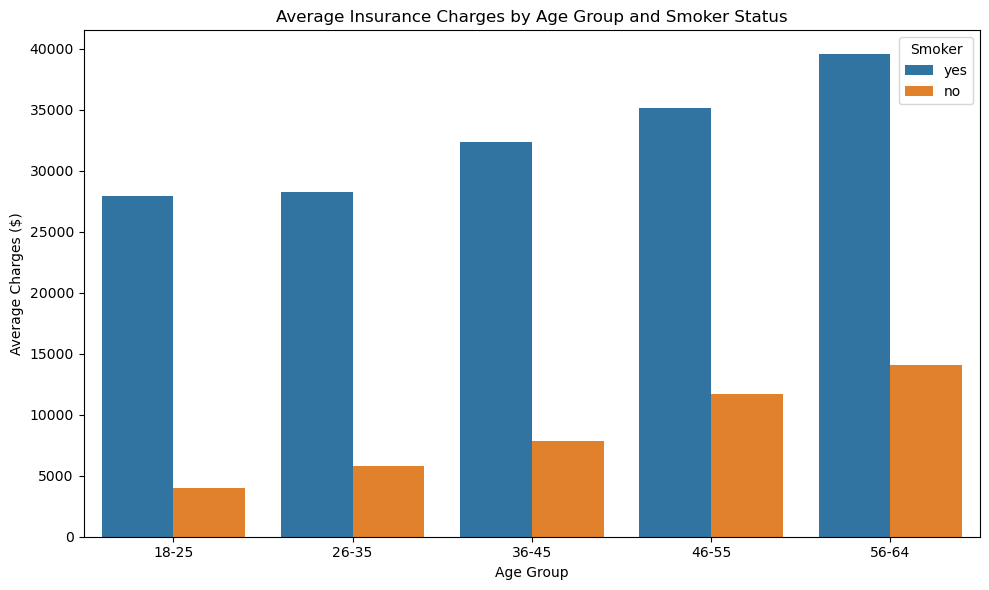

In [207]:
# Using grouped bar-chart to visualize the difference in average charges for each age group split by smoker status

plt.figure(figsize=(10, 6))
sns.barplot(data=insurance_data, x='age_group', y='charges', hue='smoker', errorbar=None)

plt.title('Average Insurance Charges by Age Group and Smoker Status')
plt.xlabel('Age Group')
plt.ylabel('Average Charges ($)')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

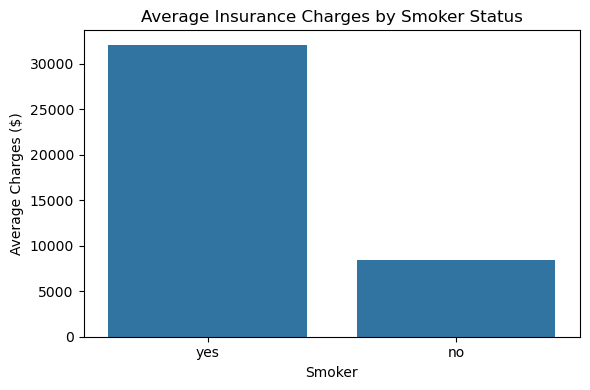

In [208]:
# Use a simple bar chart to visualize the difference in average charges for smokers vs non-smokers

plt.figure(figsize=(6, 4))

sns.barplot(data=insurance_data, x='smoker', y='charges', errorbar=None)
plt.title('Average Insurance Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges ($)')
plt.tight_layout()
plt.show()

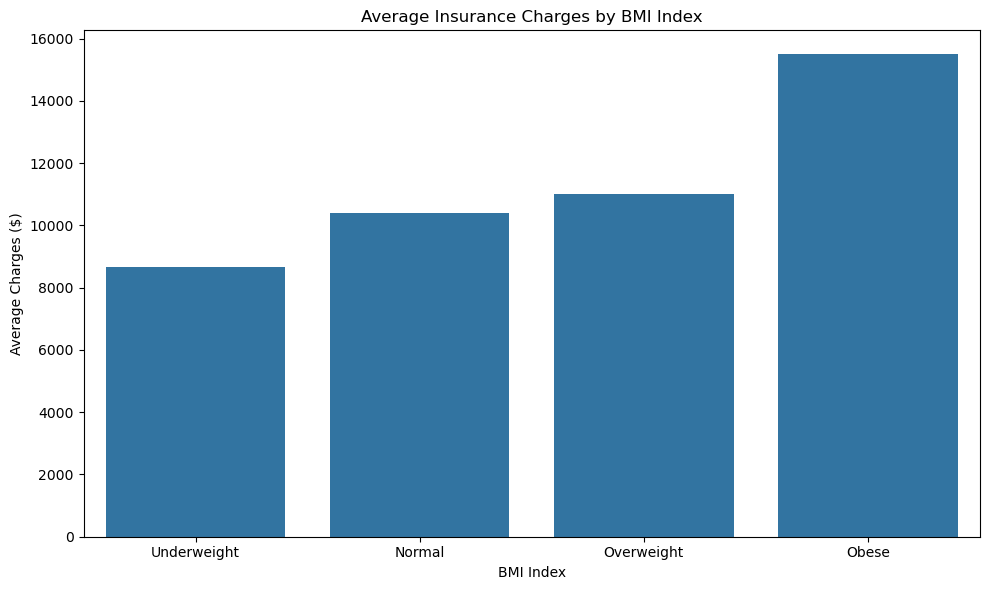

In [209]:
# Use a bar-chart to visualize and compare medical insurance costs across bmi categories

plt.figure(figsize=(10, 6))

sns.barplot(data=insurance_data, x='bmi_category', y='charges', errorbar=None)

plt.title('Average Insurance Charges by BMI Index')
plt.xlabel('BMI Index')
plt.ylabel('Average Charges ($)')
plt.tight_layout()
plt.show()

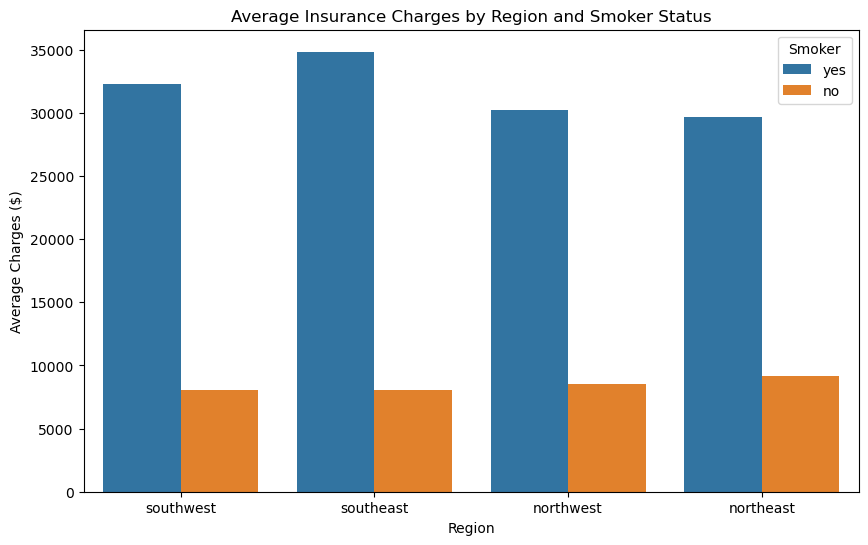

In [210]:
# Use a grouped bar-chart to visualize the difference in average insurance charges by region, split by smoker status

plt.figure(figsize=(10, 6))

sns.barplot(data=insurance_data, x='region', y='charges', hue='smoker', errorbar=None)

plt.title('Average Insurance Charges by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.legend(title='Smoker')
plt.tight_layout
plt.show()

# 🔍 Key Findings

1. **Smoking has a drastic effect on medical insurance cost**
- Smokers pay almost 4 times more than non-smokers on average ($32,050 vs $8,434)
- All 10 instances of the most expensive cases in the dataset were smokers, while all 10 instances of the cheapest cases were non-smokers.

2. **Age shows correlation with higher medical insurance costs**
- Insurance charges increase steadily with age, with the oldest group (56-64) paying **2x more** than the youngest (18-25):
  - (18-25): $9,087
  - (26-35): $10,495
  - (36-45): $13,493
  - (46-55): $15,987
  - (56-64): $18,796

**It is important to note that:**
This correlation does not imply direct causation. Other factors like smoking status or regional healthcare costs could contribute. Further analysis could isolate age's independent effect while controlling for confounders. 

3. **Difference in  Regional Charges**
People living in the **Southeast** tend to pay more on average ($14, 735) vs **Southwest** which have the lowest average ($12,347)

4. **The number of children does not appear to have a strong influence on insurance charges overall. However, it is notable that individuals with five children had the lowest average charges among high-cost individuals, which may suggest an exception or outlier**

5. **BMI shows a meaningful correlation with insurance costs**
- Individuals categorized as **Obese** had the highest average charges, followed by those who are **Overweight**.
- While not as impactful as smoking, **BMI still appears to influence charges**, especially among higher-cost individuals.
- This suggests that insurance providers may factor weight-related health risks into pricing models.

# 🧾 Conclusion & Takeaway
This project set out to explore how different factors (like age, region, BMI and smoker status) influence medical insurance charges. The results showed that **smoking status** is the strongest cost-driving factor, with smokers paying nearly four times more than non-smokers. **Age** also has a clear relationship with rising costs, with older adults generally paying more for insurance.

**Region** plays a role too, as individuals in the **Southeast** consistently face higher charges than those in other areas. Although the **number of children** did not show a strong overall effect, a few outliers suggest there may be exceptions worth exploring.

Lastly, **BMI category** showed a meaningful correlation with higher charges, especially for individuals in the Obese range. While the impact of BMI wasn’t as dramatic as smoking, it does reinforce the connection between health risk and insurance cost.

In summary, my analysis shows how lifestyle and demographic factors intersect to shape real-world insurance pricing. This project also provided hands-on experience in data cleaning, grouping, visualization, and storytelling — all essential tools for building data-driven insights.
